In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from matplotlib import pyplot as plt
import seaborn as sn

from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = pd.read_csv('dataset.csv', index_col=0)

dataset.head()

,date,symbol,econ_branch,score,year,month,day,close,roi_month,roi_quarter,roi_halfyear,roi_year
0,2004-02-11,SU,Energy Minerals,0.953727,2004,2,11,13.285000,0.015807,-0.085058,0.048927,0.406473
1,2004-02-11,GGG,Producer Manufacturing,0.952753,2004,2,11,9.388889,-0.048047,-0.010888,0.087811,0.348402
2,2004-02-11,CWT,Utilities,0.934181,2004,2,11,14.720000,-0.002717,-0.068954,-0.070992,0.178668
3,2004-02-11,BLL,Process Industries,0.922862,2004,2,11,8.095000,0.006640,-0.023935,0.124923,0.361334
4,2004-02-11,APA,Energy Minerals,0.912117,2004,2,11,39.830002,0.008034,0.025860,0.082350,0.442882


In [3]:
dataset_prices = dataset
for roi in ['roi_month', 'roi_quarter', 'roi_halfyear', 'roi_year']:
    dataset_prices['price_'+roi[4:]] = dataset_prices['close']*(dataset_prices[roi]+1)
dataset_prices

,date,symbol,econ_branch,score,year,month,day,close,roi_month,roi_quarter,roi_halfyear,roi_year,price_month,price_quarter,price_halfyear,price_year
0,2004-02-11,SU,Energy Minerals,0.953727,2004,2,11,13.285000,0.015807,-0.085058,0.048927,0.406473,13.495000,12.155000,13.935000,18.684999
1,2004-02-11,GGG,Producer Manufacturing,0.952753,2004,2,11,9.388889,-0.048047,-0.010888,0.087811,0.348402,8.937778,9.286667,10.213333,12.660000
2,2004-02-11,CWT,Utilities,0.934181,2004,2,11,14.720000,-0.002717,-0.068954,-0.070992,0.178668,14.680000,13.705000,13.675000,17.350000
3,2004-02-11,BLL,Process Industries,0.922862,2004,2,11,8.095000,0.006640,-0.023935,0.124923,0.361334,8.148750,7.901250,9.106250,11.020000
4,2004-02-11,APA,Energy Minerals,0.912117,2004,2,11,39.830002,0.008034,0.025860,0.082350,0.442882,40.150002,40.860001,43.110001,57.470001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10405,2021-04-07,RPM,Process Industries,0.657795,2021,4,7,90.209999,0.080479,0.007538,-0.115397,-0.042013,97.470001,90.889999,79.800003,86.419998
10406,2021-04-07,AZO,Retail Trade,0.651998,2021,4,7,1423.270020,0.058970,0.088543,0.183001,0.514533,1507.199951,1549.290039,1683.729980,2155.590088
10407,2021-04-07,QRVO,Electronic Technology,0.650983,2021,4,7,193.690002,-0.049099,-0.008725,-0.146420,-0.409830,184.179993,192.000000,165.330002,114.309998
10408,2021-04-07,PHM,Consumer Durables,0.646593,2021,4,7,53.529999,0.153185,0.029516,-0.109658,-0.248085,61.730000,55.110001,47.660000,40.250000


In [4]:
dataset_prices["day_sin"] = np.sin(2*np.pi*dataset_prices["day"]/31)
dataset_prices["day_cos"] = np.cos(2*np.pi*dataset_prices["day"]/31)
dataset_prices["month_sin"] = np.sin(2*np.pi*dataset_prices["month"]/12)
dataset_prices["month_cos"] = np.cos(2*np.pi*dataset_prices["month"]/12)
dataset_prices["year_sin"] = np.sin(2*np.pi*(dataset_prices["year"]-2003)/2022)
dataset_prices["year_cos"] = np.cos(2*np.pi*(dataset_prices["year"]-2003)/2022)
dataset_prices["sin_log_close"] = np.sin(np.log(dataset_prices["close"]))
dataset_prices["cube_log_score"] = np.square(np.log(dataset_prices["score"]))
# dataset_prices["reciprocal_log_close"] = np.reciprocal(np.log(dataset_prices["close"]))
# dataset_prices["sin_cos_year"] = np.sin(np.cos(dataset_prices["year"]))
# dataset_prices["sin_reciprocal_close"] = np.sin(np.reciprocal(dataset_prices["close"]))
# dataset_prices["reciprocal_cube_score"] = np.reciprocal(np.power(dataset_prices["close"], 3))

dataset_prices = dataset_prices.drop("close", axis=1)
dataset_prices = dataset_prices.drop("score", axis=1)
dataset_prices = dataset_prices.drop("day", axis=1)
dataset_prices = dataset_prices.drop("month", axis=1)
dataset_prices = dataset_prices.drop("year", axis=1)
dataset_prices

,date,symbol,econ_branch,roi_month,roi_quarter,roi_halfyear,roi_year,price_month,price_quarter,price_halfyear,price_year,day_sin,day_cos,month_sin,month_cos,year_sin,year_cos,sin_log_close,cube_log_score
0,2004-02-11,SU,Energy Minerals,0.015807,-0.085058,0.048927,0.406473,13.495000,12.155000,13.935000,18.684999,0.790776,-0.612106,0.866025,0.5,0.003107,0.999995,0.526907,0.002245
1,2004-02-11,GGG,Producer Manufacturing,-0.048047,-0.010888,0.087811,0.348402,8.937778,9.286667,10.213333,12.660000,0.790776,-0.612106,0.866025,0.5,0.003107,0.999995,0.784609,0.002343
2,2004-02-11,CWT,Utilities,-0.002717,-0.068954,-0.070992,0.178668,14.680000,13.705000,13.675000,17.350000,0.790776,-0.612106,0.866025,0.5,0.003107,0.999995,0.437112,0.004636
3,2004-02-11,BLL,Process Industries,0.006640,-0.023935,0.124923,0.361334,8.148750,7.901250,9.106250,11.020000,0.790776,-0.612106,0.866025,0.5,0.003107,0.999995,0.867595,0.006444
4,2004-02-11,APA,Energy Minerals,0.008034,0.025860,0.082350,0.442882,40.150002,40.860001,43.110001,57.470001,0.790776,-0.612106,0.866025,0.5,0.003107,0.999995,-0.516731,0.008462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10405,2021-04-07,RPM,Process Industries,0.080479,0.007538,-0.115397,-0.042013,97.470001,90.889999,79.800003,86.419998,0.988468,0.151428,0.866025,-0.5,0.055904,0.998436,-0.977979,0.175446
10406,2021-04-07,AZO,Retail Trade,0.058970,0.088543,0.183001,0.514533,1507.199951,1549.290039,1683.729980,2155.590088,0.988468,0.151428,0.866025,-0.5,0.055904,0.998436,0.829117,0.182939
10407,2021-04-07,QRVO,Electronic Technology,-0.049099,-0.008725,-0.146420,-0.409830,184.179993,192.000000,165.330002,114.309998,0.988468,0.151428,0.866025,-0.5,0.055904,0.998436,-0.850495,0.184274
10408,2021-04-07,PHM,Consumer Durables,0.153185,0.029516,-0.109658,-0.248085,61.730000,55.110001,47.660000,40.250000,0.988468,0.151428,0.866025,-0.5,0.055904,0.998436,-0.743741,0.190129


In [5]:
X = dataset_prices[['symbol', 'econ_branch',
 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'year_sin', 'year_cos',
  'sin_log_close', 'cube_log_score']]
y = dataset_prices[['roi_month', 'roi_quarter', 'roi_halfyear', 'roi_year', 'price_month',
        'price_quarter', 'price_halfyear', 'price_year']]

In [6]:
X.columns, y.columns, X.shape, y.shape

(Index(['symbol', 'econ_branch', 'day_sin', 'day_cos', 'month_sin', 'month_cos',
        'year_sin', 'year_cos', 'sin_log_close', 'cube_log_score'],
       dtype='object'),
 Index(['roi_month', 'roi_quarter', 'roi_halfyear', 'roi_year', 'price_month',
        'price_quarter', 'price_halfyear', 'price_year'],
       dtype='object'),
 (10410, 10),
 (10410, 8))

In [7]:
dummies1 = pd.get_dummies(X[['econ_branch']], drop_first=True)
dummies2 = pd.get_dummies(X[['symbol']], drop_first=True)
X = pd.concat([X.drop(['econ_branch'],axis=1), dummies1],axis=1)
X = pd.concat([X.drop(['symbol'],axis=1), dummies2],axis=1)
X.shape

(10410, 1152)

In [8]:
y

,roi_month,roi_quarter,roi_halfyear,roi_year,price_month,price_quarter,price_halfyear,price_year
0,0.015807,-0.085058,0.048927,0.406473,13.495000,12.155000,13.935000,18.684999
1,-0.048047,-0.010888,0.087811,0.348402,8.937778,9.286667,10.213333,12.660000
2,-0.002717,-0.068954,-0.070992,0.178668,14.680000,13.705000,13.675000,17.350000
3,0.006640,-0.023935,0.124923,0.361334,8.148750,7.901250,9.106250,11.020000
4,0.008034,0.025860,0.082350,0.442882,40.150002,40.860001,43.110001,57.470001
...,...,...,...,...,...,...,...,...
10405,0.080479,0.007538,-0.115397,-0.042013,97.470001,90.889999,79.800003,86.419998
10406,0.058970,0.088543,0.183001,0.514533,1507.199951,1549.290039,1683.729980,2155.590088
10407,-0.049099,-0.008725,-0.146420,-0.409830,184.179993,192.000000,165.330002,114.309998
10408,0.153185,0.029516,-0.109658,-0.248085,61.730000,55.110001,47.660000,40.250000


We split the data into train and test with proportions 0.67 - 0.33

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X["const"] = 1.0
X

,score,close,year,month,day,day_sin,day_cos,month_sin,month_cos,year_sin,...,symbol_XEL,symbol_XLNX,symbol_XOM,symbol_XRAY,symbol_XRX,symbol_XYL,symbol_YUM,symbol_ZD,symbol_ZTS,const
0,0.953727,13.285000,2004,2,11,0.790776,-0.612106,0.866025,0.5,0.003107,...,0,0,0,0,0,0,0,0,0,1.0
1,0.952753,9.388889,2004,2,11,0.790776,-0.612106,0.866025,0.5,0.003107,...,0,0,0,0,0,0,0,0,0,1.0
2,0.934181,14.720000,2004,2,11,0.790776,-0.612106,0.866025,0.5,0.003107,...,0,0,0,0,0,0,0,0,0,1.0
3,0.922862,8.095000,2004,2,11,0.790776,-0.612106,0.866025,0.5,0.003107,...,0,0,0,0,0,0,0,0,0,1.0
4,0.912117,39.830002,2004,2,11,0.790776,-0.612106,0.866025,0.5,0.003107,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10405,0.657795,90.209999,2021,4,7,0.988468,0.151428,0.866025,-0.5,0.055904,...,0,0,0,0,0,0,0,0,0,1.0
10406,0.651998,1423.270020,2021,4,7,0.988468,0.151428,0.866025,-0.5,0.055904,...,0,0,0,0,0,0,0,0,0,1.0
10407,0.650983,193.690002,2021,4,7,0.988468,0.151428,0.866025,-0.5,0.055904,...,0,0,0,0,0,0,0,0,0,1.0
10408,0.646593,53.529999,2021,4,7,0.988468,0.151428,0.866025,-0.5,0.055904,...,0,0,0,0,0,0,0,0,0,1.0


In [11]:
y_train

,roi_month,roi_quarter,roi_halfyear,roi_year,price_month,price_quarter,price_halfyear,price_year
3033,0.008192,-0.015862,0.079310,0.221022,57.840000,56.459999,61.919998,70.050003
8734,-0.044041,0.126943,0.093523,0.273057,36.900002,43.500000,42.209999,49.139999
4049,0.007254,0.077720,0.104663,0.006477,38.880001,41.599998,42.639999,38.849998
7283,0.004914,-0.008980,-0.027279,-0.225178,59.310001,58.490002,57.410000,45.730000
5265,-0.037806,-0.105114,-0.107080,-0.090253,44.029999,40.950001,40.860001,41.630001
...,...,...,...,...,...,...,...,...
5734,0.039870,0.094914,-0.023964,0.210339,99.370003,104.629997,93.269997,115.660004
5191,0.043577,0.055833,-0.064458,-0.137994,45.980000,46.520000,41.220001,37.980000
5390,0.085159,0.169285,0.255064,0.247830,52.500000,56.570000,60.720001,60.369999
860,-0.039411,-0.042682,-0.031889,-0.102208,14.685000,14.635000,14.800000,13.725000


In [12]:
X_train.shape, y_train.shape

((6974, 1152), (6974, 8))

In [13]:
#https://towardsdatascience.com/how-to-convert-pandas-dataframe-to-keras-rnn-and-back-to-pandas-for-multivariate-regression-dcc34c991df9

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.sequence import TimeseriesGenerator

In [14]:
y_cols = ['roi_month', 'roi_quarter', 'roi_halfyear', 'roi_year',
          'price_month', 'price_quarter', 'price_halfyear', 'price_year'
        ]
y_chosen = 'roi_month'
y_train_data = y_train[[y_chosen]]
y_test_data = y_test[[y_chosen]]

y_train_data.shape, y_test_data.shape

((6974, 1), (3436, 1))

In [15]:
Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(X_train)
scaled_X_train = Xscaler.transform(X_train)
scaled_X_test = Xscaler.transform(X_test)

Yscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Yscaler.fit(y_train_data)
scaled_y_train = Yscaler.transform(y_train_data)

In [16]:
scaled_X_train.shape, scaled_y_train.shape

((6974, 1152), (6974, 1))

In [20]:
n_features= X_train.shape[1]


model = keras.Sequential()  
model.add(layers.Dense(16, activation='relu',  input_shape=(scaled_X_train.shape[1],)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64, activation='relu',))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='relu',))
model.compile(optimizer='adam', loss='mse')
model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                18448     
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                1088      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 19,601
Trainable params: 19,601
Non-trainable params: 0
_________________________________________________________________


In [21]:
scaled_X_train[0][:20]

array([0.35012608, 0.02041741, 0.53589838, 0.        , 0.2942597 ,
       0.89161575, 0.10588769, 0.52602756, 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [22]:
model.fit(scaled_X_train, scaled_y_train ,epochs=64)

Epoch 1/64
218/218 [==============================] - 2s 5ms/step - loss: 0.0091
Epoch 2/64
218/218 [==============================] - 1s 4ms/step - loss: 0.0032
Epoch 3/64
218/218 [==============================] - 1s 4ms/step - loss: 0.0028
Epoch 4/64
218/218 [==============================] - 1s 4ms/step - loss: 0.0027
Epoch 5/64
218/218 [==============================] - 1s 4ms/step - loss: 0.0025
Epoch 6/64
218/218 [==============================] - 1s 4ms/step - loss: 0.0024
Epoch 7/64
218/218 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 8/64
218/218 [==============================] - 1s 4ms/step - loss: 0.0022
Epoch 9/64
218/218 [==============================] - 1s 4ms/step - loss: 0.0021
Epoch 10/64
218/218 [==============================] - 1s 5ms/step - loss: 0.0020
Epoch 11/64
218/218 [==============================] - 1s 4ms/step - loss: 0.0019
Epoch 12/64
218/218 [==============================] - 1s 4ms/step - loss: 0.0018
Epoch 13/64
218/218 [====

In [23]:
# test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(X_test)), length=input_size, batch_size=batch_size)
y_pred_scaled = model.predict(scaled_X_test)

108/108 [==============================] - 0s 3ms/step


In [24]:
y_test_data.shape, y_pred_scaled.shape

((3436, 1), (3436, 1))

In [25]:
y_pred = Yscaler.inverse_transform(y_pred_scaled)

In [26]:
y_train_pred_scaled = model.predict(scaled_X_train)

218/218 [==============================] - 0s 1ms/step


In [27]:
y_train_data.shape, y_train_pred_scaled.shape

((6974, 1), (6974, 1))

In [28]:
y_train_pred = Yscaler.inverse_transform(y_train_pred_scaled)

In [29]:
results_test = pd.DataFrame({'y_true':y_test_data[y_chosen], 'y_hat':y_pred.ravel()})
results_train = pd.DataFrame({'y_true':y_train_data[y_chosen], 'y_train_hat':y_train_pred.ravel()})

In [30]:
results_test

,y_true,y_hat
3952,0.037272,-0.017606
4597,-0.009576,-0.020079
9624,-0.108696,-0.112583
6871,-0.047912,-0.008285
4294,0.052019,-0.002904
...,...,...
4793,0.157895,-0.009373
8354,0.006912,0.038068
2063,0.014252,0.016514
7173,0.051224,-0.023085


In [36]:
print("TEST RESULTS:")
print("1. Root mean squared error: %.2f" % mean_squared_error(results_test["y_true"], results_test["y_hat"], squared=False))
print("2. Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(results_test["y_true"], results_test["y_hat"]))
print("3. R^2: %.2f" % r2_score(results_test["y_true"], results_test["y_hat"]))

TEST RESULTS:
1. Root mean squared error: 0.09
2. Mean absolute percentage error: 897180537201.20
3. R^2: -0.01


In [32]:
print("TRAIN RESULTS:")
print("1. Root mean squared error: %.2f" % mean_squared_error(results_train["y_true"], results_train["y_train_hat"], squared=False))
print("2. Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(results_train["y_true"], results_train["y_train_hat"]))
print("3. R^2: %.2f" % r2_score(results_train["y_true"], results_train["y_train_hat"]))

TRAIN RESULTS:
1. Root mean squared error: 0.07
2. Mean absolute percentage error: 250246642308.64
3. R^2: 0.45


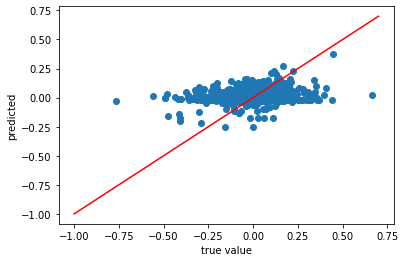

In [33]:
plt.scatter(results_test["y_true"], results_test["y_hat"])
# plt.xlim(-0.8, 0.7)
# plt.ylim(-0.8, 0.7)
plt.xlabel("true value")
plt.ylabel("predicted")
plt.plot([-1, 0.7], [-1, 0.7], color='red')
# plt.plot([-0.7, 0.6], [-0.7, 0.6], color='red')
plt.show()

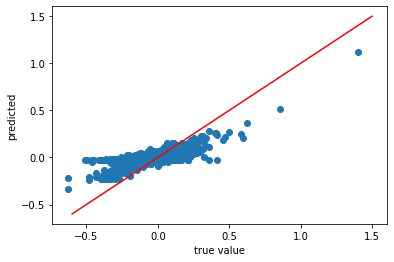

In [34]:
plt.scatter(results_train["y_true"], results_train["y_train_hat"])
plt.xlabel("true value")
plt.ylabel("predicted")
plt.plot([-0.6, 1.5], [-0.6, 1.5], color='red')
# plt.plot([-0.7, 0.6], [-0.7, 0.6], color='red')
plt.show()

Ideally all of the points should be on the red line (slope = 1)

In [137]:
def train_evaluate_rnn_model(model, X_train: pd.DataFrame, X_test: pd.DataFrame, y_train: pd.DataFrame, y_test: pd.DataFrame, epochs=5, nn_input_size=50, batch_size=32, chosen_y='price_year'):
    y_chosen = chosen_y
    y_train = y_train[[y_chosen]]
    y_test = y_test[[y_chosen]]
    y_test = y_test[:-50]
    Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
    Xscaler.fit(X_train)
    scaled_X_train = Xscaler.transform(X_train)
    scaled_X_test = Xscaler.transform(X_test)

    Yscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that y data is also in 0, 1 range
    Yscaler.fit(y_train)
    scaled_y_train = Yscaler.transform(y_train)

    generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=nn_input_size, batch_size=batch_size)

    model.fit(generator,epochs=epochs)
    test_generator = TimeseriesGenerator(scaled_X_test, np.zeros(len(X_test)), length=input_size, batch_size=32)
    y_pred_scaled = model.predict(test_generator)
    y_pred = Yscaler.inverse_transform(y_pred_scaled)
    print(y_pred, y_test)
    errors_report = ["1. Root mean squared error: %.2f" % mean_squared_error(y_test, y_pred, squared=False)]
    errors_report.append("2. Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(y_test, y_pred))
    errors_report.append("3. R^2: %.2f" % r2_score(y_test, y_pred))
    print(errors_report)
    return errors_report, y_pred, y_test

In [50]:
y_train, y_test

(      roi_month  roi_quarter  roi_halfyear  roi_year  price_month  \
 3033   0.008192    -0.015862      0.079310  0.221022    57.840000   
 8734  -0.044041     0.126943      0.093523  0.273057    36.900002   
 4049   0.007254     0.077720      0.104663  0.006477    38.880001   
 7283   0.004914    -0.008980     -0.027279 -0.225178    59.310001   
 5265  -0.037806    -0.105114     -0.107080 -0.090253    44.029999   
 ...         ...          ...           ...       ...          ...   
 5734   0.039870     0.094914     -0.023964  0.210339    99.370003   
 5191   0.043577     0.055833     -0.064458 -0.137994    45.980000   
 5390   0.085159     0.169285      0.255064  0.247830    52.500000   
 860   -0.039411    -0.042682     -0.031889 -0.102208    14.685000   
 7270  -0.050170    -0.089286     -0.057540  0.048753    33.509998   
 
       price_quarter  price_halfyear  price_year  
 3033      56.459999       61.919998   70.050003  
 8734      43.500000       42.209999   49.139999  
 4049

In [33]:
n_features= X_train.shape[1]


simple_model = keras.Sequential()
simple_model.add(layers.LSTM(10, activation='relu', input_shape=(input_size, n_features)))
simple_model.add(layers.Dense(1))
simple_model.compile(optimizer='adam', loss='mse')
simple_model.summary()

big_lstm_model = keras.Sequential()
big_lstm_model.add(layers.LSTM(128, activation='relu', input_shape=(input_size, n_features), return_sequences=True))
big_lstm_model.add(layers.LSTM(32, activation='relu', input_shape=(input_size, n_features), return_sequences=True))
big_lstm_model.add(layers.LSTM(8, activation='relu', input_shape=(input_size, n_features)))
big_lstm_model.add(layers.Dense(10))
big_lstm_model.add(layers.Dense(1))
big_lstm_model.compile(optimizer='adam', loss='mse')
big_lstm_model.summary()

chosen_model = big_lstm_model

errors_report, y_pred, y_test = train_evaluate_rnn_model(chosen_model, X_train, X_test, y_train, y_test, epochs=5)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 10)                46880     
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 46,891
Trainable params: 46,891
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 50, 128)           660480    
                                                                 
 lstm_7 (LSTM)               (None, 50, 32)            20608     
                                                                 
 lstm_8 (LSTM)              